In [6]:
import random
import math
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

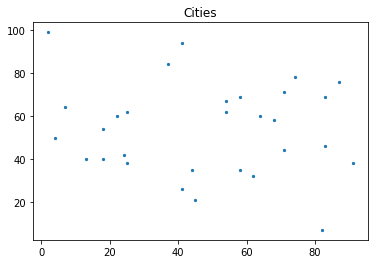

In [7]:
data = np.array(pd.read_excel("../dataSet/Oliver30.xlsx",header=None))
plt.title("Cities")
plt.scatter(data[:,0],data[:,1],s=5)
plt.show()

In [8]:
class PSO_4_TSP():
    def __init__(self, data, m, max_epoch):
        self.dist  = squareform(pdist(data, metric='euclidean'))  # 计算N个城市的距离矩阵
        self.cityNums = data.shape[0]  #城市数目
        self.m  = m   # 粒子数目
        self.max_epoch = max_epoch #最大迭代次数
        self.area = data.shape[0]  # 最大范围限制，最小默认为0
        ptemp = list()
        # 初始化粒子群位置
        for i in range(self.m):
            ptemp.append(random.sample(range(self.cityNums), self.cityNums))
        self.particles = np.array(ptemp)#.T  # 粒子群位置
        self.pbestPositions = np.zeros((self.m, self.particles.shape[1])) # 粒子群个体的最佳位置-局部最优解   粒子数*城市数
        self.pbestValues = np.ones(self.m) * np.inf # 粒子群个体的最佳适应值-局部最优值   1*粒子数
        self.gbestSolution = self.pbestPositions[0] # 粒子群的最佳位置   1*城市数
        self.gbestValue = np.inf # 粒子群的最佳适应值   1
        return
    
    def calcuValue(self, solution):  # 计算状态值
        value = 0
        for c in range(self.cityNums-1):
            value += self.dist[int(solution[c]), int(solution[c+1])]
        value += self.dist[int(solution[0]), int(solution[-1])]
        return value
    
    def pbest(self):
        for i,p in enumerate(self.particles):
            fitValue = self.calcuValue(p)
            if fitValue < self.pbestValues[i]:
                self.pbestValues[i] = fitValue
                self.pbestPositions[i] = p
        return
    
    def update(self):   # 有序交叉法
        for k, i in enumerate(self.particles):
            x1 = i
            for flag in range(2):
                if flag == 0:
                    x = self.gbestSolution
                else:
                    x = self.pbestPositions[k]
                positions = random.sample(range(self.cityNums), 2)  # 随机两个交叉位
                positions.sort()
                com1  = list(x1[positions[0]:positions[1]+1])
                com2  = list(x[positions[0]:positions[1]+1])
                limit = list(range(positions[0])) + list(range(positions[1]+1, self.cityNums))
                for p in limit:            
                    temp = x1[p]
                    if x[p] not in com1:
                        x1[p] = x[p]
                    else:
                        index = com1.index(x[p])
                        while com2[index] in com1:
                            index = com1.index(com2[index])
                        x1[p] = com2[index]  
        return
    
    def electBest(self):
        for k, p in enumerate(self.pbestPositions):
            v = self.calcuValue(p)
            if v < self.gbestValue:
                self.gbestValue = v
                self.gbestSolution = self.pbestPositions[k]    
        return
    
    def evolute(self):
        i = 0 
        self.pbest()
        while i < self.max_epoch: # 达到最大迭代次数，停止迭代
            i += 1
            # 全局搜索
            self.update()
            self.pbest()
            # 选举出当前最优解/值
            self.electBest()
            print(i)
        print('最优解:', self.gbestSolution)
        print('最优值:', self.gbestValue)
        return self.gbestValue, self.gbestSolution

In [9]:
m  = 50         # 粒子数目
max_epoch = 100 # 迭代次数

In [10]:
tpso = PSO_4_TSP(data, m, max_epoch)
tpso.evolute()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
最优解: [ 4. 11. 16. 22. 21. 15. 28. 27. 23.  7.  3. 24. 26. 17. 18. 20. 19. 12.
 29.  5.  2. 10. 25. 14.  9. 13.  6.  8.  0.  1.]
最优值: 801.2513272661274


(801.2513272661274,
 array([ 4., 11., 16., 22., 21., 15., 28., 27., 23.,  7.,  3., 24., 26.,
        17., 18., 20., 19., 12., 29.,  5.,  2., 10., 25., 14.,  9., 13.,
         6.,  8.,  0.,  1.]))